In [75]:
import warnings
warnings.filterwarnings('ignore')

In [76]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

In [78]:
df = pd.read_csv('diabetes.csv')

In [79]:
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


<Axes: xlabel='Pregnancies'>

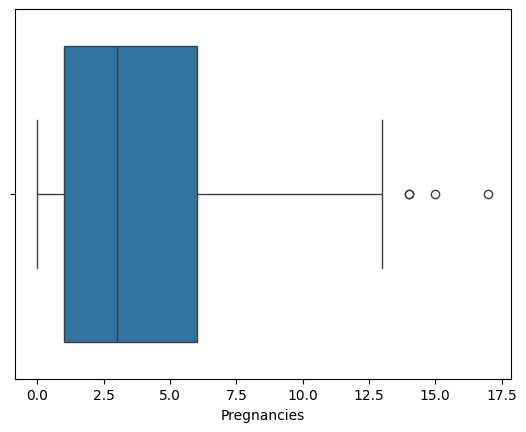

In [80]:
sns.boxplot(x=df['Pregnancies'])

In [81]:
df['Pregnancies'][df['Pregnancies'] > 12] = df['Pregnancies'].median()

<Axes: xlabel='Glucose'>

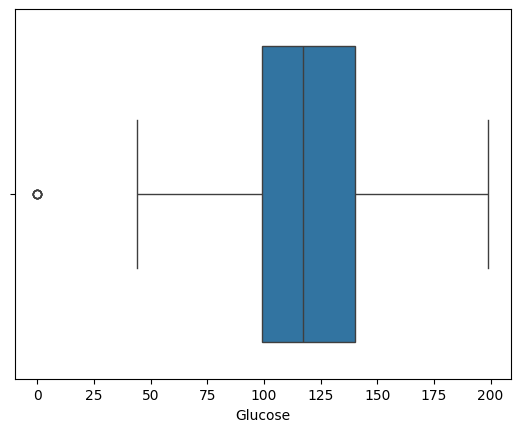

In [82]:
sns.boxplot(x=df['Glucose'])

In [83]:
df['Glucose'][df['Glucose'] < 25] = df['Glucose'].mean()

<Axes: xlabel='BloodPressure'>

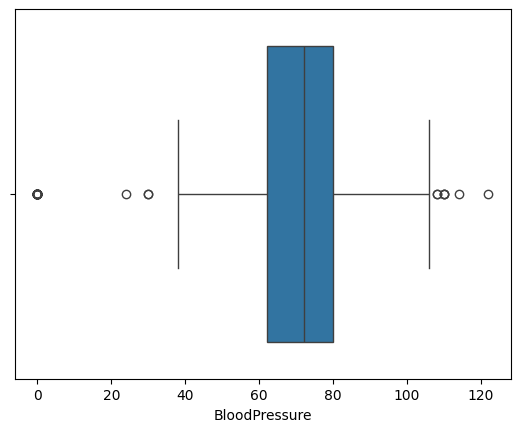

In [84]:
sns.boxplot(x=df['BloodPressure'])

In [85]:
df['BloodPressure'][df['BloodPressure'] < 40] = df['BloodPressure'].mean()

<Axes: xlabel='SkinThickness'>

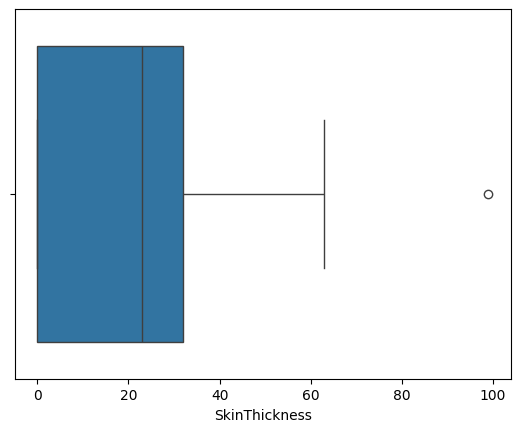

In [86]:
sns.boxplot(x=df['SkinThickness'])

In [87]:
df['SkinThickness'][df['SkinThickness'] > 80] = df['SkinThickness'].mean()

<Axes: xlabel='Insulin'>

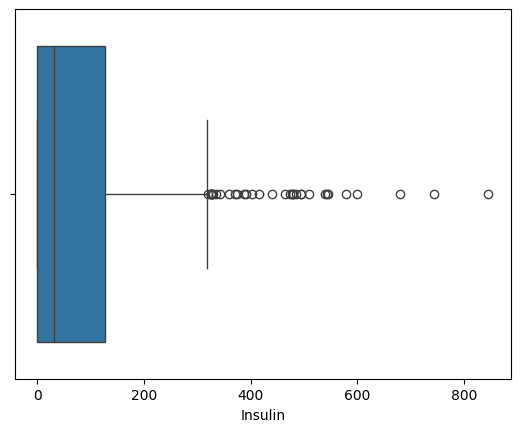

In [88]:
sns.boxplot(x=df['Insulin'])

In [89]:
df['Insulin'][df['Insulin'] > 300] = df['Insulin'].mean()

<Axes: xlabel='BMI'>

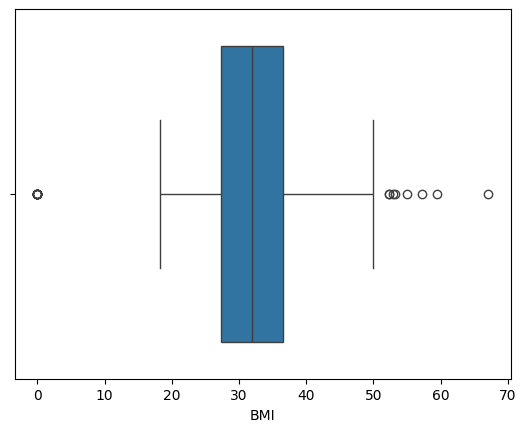

In [90]:
sns.boxplot(x=df['BMI'])

In [91]:
df['BMI'][df['BMI'] < 10] = df['BMI'].mean()
df['BMI'][df['BMI'] > 60] = df['BMI'].mean()

<Axes: xlabel='DiabetesPedigreeFunction'>

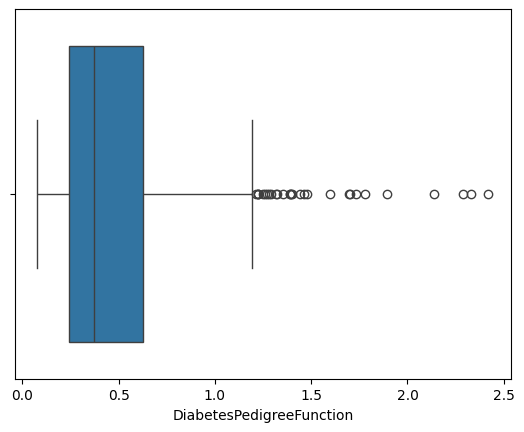

In [92]:
sns.boxplot(x=df['DiabetesPedigreeFunction'])

<Axes: xlabel='Age'>

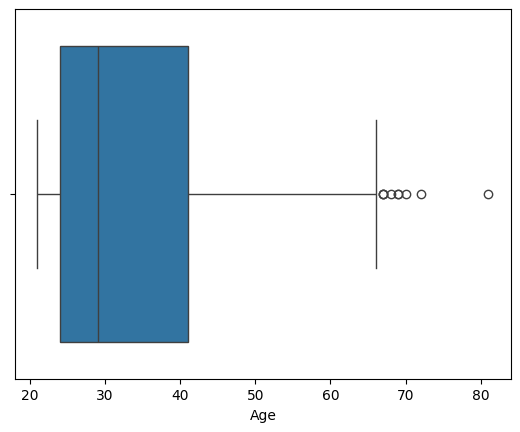

In [93]:
sns.boxplot(x=df['Age'])

In [94]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [96]:
model = KNeighborsClassifier()

In [97]:
params = {
    'n_neighbors': [i for i in range(50)],
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
}

In [98]:
final_model = GridSearchCV(model, param_grid=params, verbose=2, cv=3, n_jobs=-1)

In [99]:
final_model.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan',
                                    'chebyshev'],
                         'n_neighbors': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                         12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
                                         22, 23, 24, 25, 26, 27, 28, 29, ...]},
             verbose=2)

In [100]:
final_model.best_params_

{'metric': 'manhattan', 'n_neighbors': 11}

In [101]:
y_pred = final_model.predict(X_test)

In [102]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       112
           1       0.63      0.81      0.71        42

    accuracy                           0.82       154
   macro avg       0.77      0.82      0.79       154
weighted avg       0.84      0.82      0.82       154



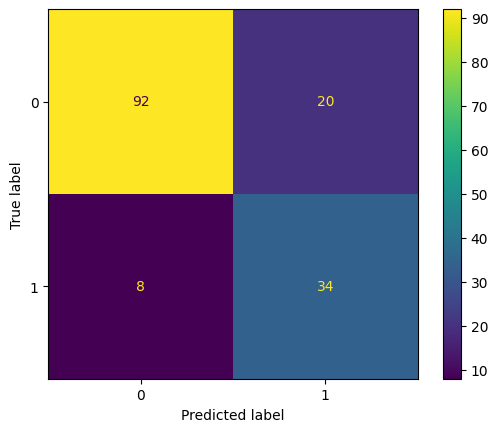

In [103]:
ConfusionMatrixDisplay(confusion_matrix(y_pred, y_test)).plot()